# Final Tutorial: Understanding Global Economy, Wealth, and Health

## Casey Oppenheim and Walker Owen

## Data Collection

We chose to get a data set with 40+ statistics for 200+ countries from https://perso.telecom-paristech.fr/eagan/class/igr204/datasets. There is general data for each country such as population size and area, economic data such as GDP and Unemployment rate(%), and health data such as Infant mortality rate and HIV statistics. The data set was stored in a comma seperated value file(.csv) and by using pandas read_csv function, we were able to quickly store the data in a pandas dataframe. Because we are dealing with countries in the world, we felt a great mode of data visualization would be maps. We read longitudal and latitudinal data for various countries from an additional .csv file from https://www.kaggle.com/paultimothymooney/latitude-and-longitude-for-every-country-and-stateinto into a second dataframe.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import folium

data = pd.read_csv("factbook.csv", sep=';')
long_and_lat = pd.read_csv("world_country_and_usa_states_latitude_and_longitude_values.csv")


## Data Processing

The first step in processing our data was to get the Longitude and Latitude columns from our "long_and_lat" dataframe into our "data" dataframe. We were able to do that by using the pandas merge function. Each row in our two dataframes that have a matching "Country" column are combined. Furthermore, if country 'x' is in both dataframes, the columns from "long_and_lat" are added into "data". "data" originally had 264 rows and "long_and_lat" originally had 245. After merging our dataframes, we have data for 220 countries! There are several NaN entries in our dataset and we chose to leave them prior to doing analysis. By removing all NaN entries before analysis, any Country with 1 or more missing data entries(out of 47) would be erased. For example, Afghanistan doesn't have any data on Railways(km) but that doesn't mean we want it erased for the analysis on GDP, Oil Production, etc. When doing analysis on the correlation between two or more variables, we will do data processing and null-entry-removal then.

In [2]:
long_and_lat = long_and_lat.drop(columns=['usa_state_code', 'usa_state_latitude', 'usa_state_longitude', 'usa_state', 'country_code'])
long_and_lat = long_and_lat.rename(columns={'country': 'Country', 'latitude' : 'Latitude', 'longitude':'Longitude'})
data = pd.merge(data, long_and_lat, on="Country")
data

,Country,Area(sq km),Birth rate(births/1000 population),Current account balance,Death rate(deaths/1000 population),Debt - external,Electricity - consumption(kWh),Electricity - production(kWh),Exports,GDP,...,Population,Public debt(% of GDP),Railways(km),Reserves of foreign exchange & gold,Telephones - main lines in use,Telephones - mobile cellular,Total fertility rate(children born/woman),Unemployment rate(%),Latitude,Longitude
0,Afghanistan,647500,47.02,NaN,20.75,8000000000,652200000,540000000,446000000,21500000000,...,29928987,NaN,NaN,NaN,33100,15000,6.75,NaN,33.939110,67.709953
1,Albania,28748,15.08,-504000000,5.12,1410000000,6760000000,5680000000,552400000,17460000000,...,3563112,NaN,447,1206000000,255000,1100000,2.04,14.80,41.153332,20.168331
2,Algeria,2381740,17.13,11900000000,4.60,21900000000,23610000000,25760000000,32160000000,212300000000,...,32531853,37.40,3973,43550000000,2199600,1447310,1.92,25.40,28.033886,1.659626
3,American Samoa,199,23.13,NaN,3.33,NaN,120900000,130000000,30000000,500000000,...,57881,NaN,NaN,NaN,15000,2377,3.25,6.00,-14.270972,-170.132217
4,Andorra,468,9.00,NaN,6.07,NaN,NaN,NaN,58000000,1900000000,...,70549,NaN,NaN,NaN,35000,23500,1.29,0.00,42.546245,1.601554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,Wallis and Futuna,274,NaN,NaN,NaN,NaN,NaN,NaN,250000,60000000,...,16025,NaN,NaN,NaN,1900,0,NaN,NaN,-13.768752,-177.156097
216,Western Sahara,266000,NaN,NaN,NaN,NaN,83700000,90000000,NaN,NaN,...,273008,NaN,NaN,NaN,NaN,0,NaN,NaN,24.215527,-12.885834
217,Yemen,527970,43.07,369900000,8.53,5400000000,2827000000,3040000000,4468000000,16250000000,...,20727063,46.40,NaN,5300000000,542200,411100,6.67,35.00,15.552727,48.516388
218,Zambia,752614,41.38,-181400000,20.23,5353000000,5345000000,8167000000,1548000000,9409000000,...,11261795,127.50,2173,345000000,88400,241000,5.47,50.00,-13.133897,27.849332


## Exploratory Analyis and Data Visualization

### Population Size vs Area(sq km)

We thought that an analysis of the relation between countries' population size and land size would be an interesting statistic. Using a scatter plot, we are able to see the range that most countries lie between and with a regression line, we are able to see the general trend of population size as the area increases. 

Population = ( 30.765690035516545 * Area ) +  10140102.66963543


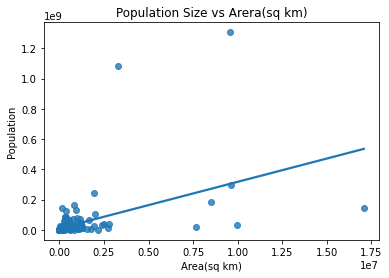

In [3]:
temp = data[pd.notnull(data["Area(sq km)"])]
temp = temp[pd.notnull(temp["Population"])]
temp["Area(sq km)"] = temp["Area(sq km)"].astype(int)
temp["Population"] = temp["Population"].astype(int)
sns.regplot(x = temp["Area(sq km)"],y = temp["Population"], ci = None).set( xlabel = "Area(sq km)", ylabel = "Population", title="Population Size vs Arera(sq km)")
model = LinearRegression().fit(np.array(temp["Area(sq km)"]).reshape(-1,1), np.array(temp["Population"]).reshape(-1,1))
model.score(np.array(temp["Area(sq km)"]).reshape(-1,1), np.array(temp["Population"]).reshape(-1,1))
print('Population = (', model.coef_[0][0],'* Area ) + ',model.intercept_[0] )


We see that over 90% of our data has a population size under 200,000,000 and area under 2,500,000 square kilometers. Only a dozen countries exceed that range. Looking at our regression line forumula that we calculated and displayed on the plot, we see that for every sq km increase in area results in about 31 more country residents. The scatterplot and regression line did great job at giving us the general trend of Population Size vs Area(sq km) but it would be nice to see what parts of the world are particulary dense in population in relation to size. That observation can be found by using a map, with each country having a tag that is colored bases upon their population density. We used 6 different colors (darkred, red, lightred, lightgreen, green, darkgreen) to mark the different population densities with dark red being the most dense and dark green being least dense. 

In [4]:
map_osm = folium.Map(location=[0, 0], zoom_start=2)
#print((temp['Population']/temp['Area(sq km)']).sort_values(ascending=True).describe())
sorted = (temp['Population']/temp['Area(sq km)']).sort_values(ascending=True)
for index, row in temp.iterrows():
    if((row['Population']/row['Area(sq km)']) < 19.1664):
        color = 'darkgreen'
    elif((row['Population']/row['Area(sq km)']) < 42.2457):
        color = 'green'
    elif((row['Population']/row['Area(sq km)']) < 75.461310):
        color = 'lightgreen'
    elif((row['Population']/row['Area(sq km)']) < 126.925925):
        color = 'lightred'
    elif((row['Population']/row['Area(sq km)']) < 260.502359):
        color = 'red'
    else:
        color = 'darkred'
    folium.Marker(location= [row['Latitude'],row['Longitude']] ,popup= row["Country"],icon=folium.Icon(color= color),).add_to(map_osm)
print("Low Population Density --------> High Population Density")
print("(darkgreen, green, lightgreen, lightred, red, darkred)")
map_osm

Low Population Density --------> High Population Density
(darkgreen, green, lightgreen, lightred, red, darkred)


By looking at the map we can see that places like Central America, Europe, and certain parts of Asia are incredibly dense. North America, South America and Africa are significantly less dense, having more land per person.

### Top 5 Energy Providers and Consumers

We decided to look at the Top 5 producers and consumers of Oil and Natural Gas and where they are located in the world. We predict the top oil producers to be located in the middle east and the biggest consumers of each resource to be countries with successful economies.

In [5]:
map_osm = folium.Map(location=[0, 0], zoom_start=2)
temp = data[pd.notnull(data["Oil - production(bbl/day)"])]
temp = temp[pd.notnull(temp["Oil - consumption(bbl/day)"])]
temp = temp[pd.notnull(temp["Natural gas - consumption(cu m)"])]
temp = temp[pd.notnull(temp["Natural gas - production(cu m)"])]
temp["Oil - production(bbl/day)"] = temp["Oil - production(bbl/day)"].astype(int)
temp["Oil - consumption(bbl/day)"] = temp["Oil - consumption(bbl/day)"].astype(int)
temp["Natural gas - consumption(cu m)"] = temp["Natural gas - consumption(cu m)"].astype(int)
temp["Natural gas - production(cu m)"] = temp["Natural gas - production(cu m)"].astype(int)
#print((temp['Population']/temp['Area(sq km)']).sort_values(ascending=True).describe())
#sorted = (temp["Natural gas - production(cu m)"]).sort_values(ascending=True)
#print(list(sorted))
for index, row in temp.iterrows():
    x = 0
    long = row['Longitude']
    if(row['Oil - production(bbl/day)'] > 3392000):
        color = 'darkgreen'
        folium.Marker(location= [row['Latitude'],long] ,popup= row["Country"],icon=folium.Icon(color= color),).add_to(map_osm)
        x +=1
    if(row['Oil - consumption(bbl/day)'] > 2200000):
        color = 'darkred'
        if x > 0:
            long -= 5
        folium.Marker(location= [row['Latitude'],long] ,popup= row["Country"],icon=folium.Icon(color= color),).add_to(map_osm)
        x +=1
    if(row['Natural gas - consumption(cu m)'] > 79860000000):
        color = 'lightred'
        if x > 0:
            long -= 5
        folium.Marker(location= [row['Latitude'],long] ,popup= row["Country"],icon=folium.Icon(color= color),).add_to(map_osm)
        x +=1
    if(row['Natural gas - production(cu m)'] > 79000000000):
        color = 'lightgreen'
        if x > 0:
            long -= 5
        folium.Marker(location= [row['Latitude'],long] ,popup= row["Country"],icon=folium.Icon(color= color),).add_to(map_osm)
        x +=1
print("Oil Consumer | Gas Consumer | Oil Producer | Gas Producer")
print("  darkred    |   lightred   |   darkgreen  |  lightgreen")
map_osm

Oil Consumer | Gas Consumer | Oil Producer | Gas Producer
  darkred    |   lightred   |   darkgreen  |  lightgreen


Many of our predictions were true although we saw countries like the United States and Russia that were top 5 in all 4 metrics. This is because of their global dominance but also due to their large quantity of land(especially Russia). Russia is bound to consume the most considering they have such a massive population. Other than the United States, the top consumers of Gas and Oil were in Europe and the Middle East. Producers of Gas and Oil were scattered all over the world.

### GDP Across the World

Here, we decided that it would be interesting to be able to visualize GDP across the world. To do this, we decided to create brackets. The range between the maximum and minimum GDP’s was divided into 7 brackets, allowing us to visualize the distribution. The ranges start off in dark red (lowest GDP), then red, light red, white, light green, green, and dark green for the highest global GDP. 

In [12]:
# GDP Map based on ranges
map_osm = folium.Map(location=[39.29, -76.61], zoom_start=2)
temp = data[pd.notnull(data["GDP"])]
temp["GDP"] = temp["GDP"].astype(int)
list = temp["GDP"].unique()
temp["GDP"].describe()
np.sort(list)
map_osm

range1 = temp[temp["GDP"] < 50000000]

range2 = temp[(temp["GDP"] > 50000000) & (temp["GDP"] <(50000000 + 1999990000000))]

range3 = temp[(temp["GDP"] > (50000000 + 1999990000000)) & (temp["GDP"] <(50000000 + (1999990000000*2)))]

range4 = temp[(temp["GDP"] > (50000000 + (1999990000000*2))) & (temp["GDP"] <(50000000 + (1999990000000*3)))]

range5 = temp[(temp["GDP"] > (50000000 + (1999990000000*3))) & (temp["GDP"] <(50000000 + (1999990000000*4)))]

range6 = temp[(temp["GDP"] > (50000000 + (1999990000000*4))) & (temp["GDP"] <(50000000 + (1999990000000*5)))]

range7 = temp[temp["GDP"] > 10000000000000]

range1.apply(lambda row:folium.Marker(location = [row["Latitude"],row["Longitude"]],popup = row["Country"],icon=folium.map.Icon(color = 'darkred')).add_to(map_osm), axis=1)
range2.apply(lambda row:folium.Marker(location = [row["Latitude"],row["Longitude"]],popup = row["Country"],icon=folium.map.Icon(color = 'red')).add_to(map_osm), axis=1)
range3.apply(lambda row:folium.Marker(location = [row["Latitude"],row["Longitude"]],popup = row["Country"],icon=folium.map.Icon(color = 'lightred')).add_to(map_osm), axis=1)
range4.apply(lambda row:folium.Marker(location = [row["Latitude"],row["Longitude"]],popup = row["Country"],icon=folium.map.Icon(color = 'white')).add_to(map_osm), axis=1)
range5.apply(lambda row:folium.Marker(location = [row["Latitude"],row["Longitude"]],popup = row["Country"],icon=folium.map.Icon(color = 'lightgreen')).add_to(map_osm), axis=1)
range6.apply(lambda row:folium.Marker(location = [row["Latitude"],row["Longitude"]],popup = row["Country"],icon=folium.map.Icon(color = 'green')).add_to(map_osm), axis=1)
range7.apply(lambda row:folium.Marker(location = [row["Latitude"],row["Longitude"]],popup = row["Country"],icon=folium.map.Icon(color = 'darkgreen')).add_to(map_osm), axis=1)
print("       Low GDP ------------------------> High GDP")
print("(darkred, red, lightred, white, lightgreen, green, darkgreen)")
map_osm


/var/folders/f3/vlzb_f3d0xz52v5xxjw2k_9c0000gn/T/ipykernel_23340/3720214593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["GDP"] = temp["GDP"].astype(int)


       Low GDP ------------------------> High GDP
(darkred, red, lightred, white, lightgreen, green, darkgreen)


Analysis of this graph allows us to conclude that a vast majority of the global GDP's reside in range 2, a very very very small percent of the population has a GDP in the upper range (5-7) with only one country in the top bracket (US). The map is covered in red dots, indicating visually that the majority of the countries fall below 50% of the maximum GDP. When you click on each point on the map, the countries name is displayed for ease of understanding. The practical applications of this include an understanding of the wealth inequality in the global economy. This map also shows the difference between the United States and every other country, given that the United States has the entire upper bracket entirely to themselves. The only close comparison is China, whom of which the United States shares a lot of economic and security interests with. The lowest GDP bracket appears to be entirely composed of islands. Africa, Europe, and South America are also highly concentrated with low GDP countries.

### GDP vs Military Expenditures

We chose to look at the relationship between these variables to determine if there was a relationship between military expenditures and overall economic success for the country. Unfortunately, there is no "success" metric in the dataset, so we chose to operationalize success using GDP. We processed the data to remove null entries in either column (military expenditures, and GDP). 

[Text(0.5, 0, 'GDP'),
 Text(0, 0.5, 'Military Spending'),
 Text(0.5, 1.0, 'Military Expenditures vs GDP')]

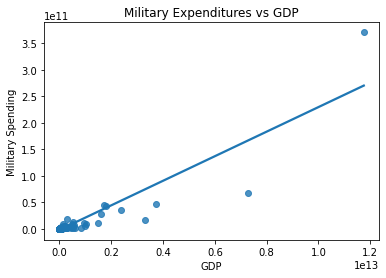

In [7]:
temp = data[pd.notnull(data["GDP"])]
temp = temp[pd.notnull(temp["Military expenditures - dollar figure"])]
temp["GDP"] = temp["GDP"].astype(int)
temp["Military expenditures - dollar figure"] = temp["Military expenditures - dollar figure"].astype(int)
sns.regplot(x = temp["GDP"],y = temp["Military expenditures - dollar figure"], ci = None).set( xlabel = "GDP", ylabel = "Military Spending", title="Military Expenditures vs GDP")


In [8]:
xnew = np.array(temp["GDP"]).reshape(-1,1)
ynew = np.array(temp["Military expenditures - dollar figure"]).reshape(-1,1)
modelnew = LinearRegression().fit(xnew, ynew)
r_sqnew = modelnew.score(xnew,ynew)
print('coefficient of determination:', r_sqnew)

coefficient of determination: 0.8139772037054974


Analysis of this graph, and the coefficient of determination of .81398, indicate a strong linear relationship between military expenditures and GDP. From this analysis, we can conclude that the two variables are related. However, because we are only looking at the coefficient of determination here, we cannot conclude causality. To elaborate, we cannot determine if increased military expenditures results in a higher GDP or vice versa. To explore this relationship further it is worthwhile to monitor the relationships in a more longitudinal study. 

## Machine Learning for Predicting Fertility rate via Unemployment rate 

We decided to conduct Linear Discriminant Analysis on Total Fertility Rate and Unemployment Rate to see if we could find a predictive relationship. We assume that when an Economy is doing really well, Unemployment Rates are low, and birth rates should be high. We saw this with the baby boomers in the aftermath of world war II.

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from numpy import sqrt
temp = data[pd.notnull(data["Total fertility rate(children born/woman)"])]
temp = temp[pd.notnull(temp["Unemployment rate(%)"])]
X = np.array(temp["Total fertility rate(children born/woman)"]).reshape(-1,1)
y = np.array(temp["Unemployment rate(%)"]).reshape(-1,1)
#LDA
#holdout validation accuracy check
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=7)
model = LinearDiscriminantAnalysis()
model.fit(X_train.reshape(-1,1), Y_train.reshape(-1,1))
LinearDiscriminantAnalysis()
accuracy = model.score(X_test, Y_test)
print("Accuracy of LDA: %.2f%%" % (accuracy*100.0))
print("Accuracy of LDA across 5-fold cross-validation")
clf1 = LinearDiscriminantAnalysis()
print(cross_val_score(clf1, X, y, cv=5))

Accuracy of LDA: 3.39%
Accuracy of LDA across 5-fold cross-validation
[0.08333333 0.05714286 0.05714286 0.         0.02857143]


/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/si

Unfortunately, we determined that there was not a strong predictive relationship between the two variables at all. We thought that fertility rate and unemployment rate would be interesting to test because of the intuitive relationship between being employed and having children. We assumed that in countries where unemployment was lower, fertility rate would be higher because more people are financially secure enough to start a family. However, as demonstrated by the accuracy of the LDA being 3.39%, it is clear that the LDA does not do a good job of prediction.